In [1]:
from pathlib import Path
import pandas as pd

## Near_field

In [2]:
current_dir = Path.cwd()
parent_dir = current_dir.parent
input_dir1 = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset")

#Access folders inside input folder
input_dir2 =  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()]
#print ("INPUT 2",input_dir2)

In [9]:
# Dictionary to store max pressure for each file across all folders
max_pressure_per_SD = {}
min_pressure_per_SD = {}
datapoints_per_SD = {}

# Iterate through each folder in input_dir2
for folder in input_dir2:
    print(f"Processing folder: {folder}")
    
    # Iterate through files in the folder (assuming files are named as file1, file2, etc.)
    for i in range(1, 18,2):  # Assuming file names are like file1, file2, ... file99
        file_name = f"{i}.xlsx"
        file_path = folder / file_name
        
        if file_path.exists():
            # Read the file (assuming it is in a format that can be read by pandas, e.g., CSV, Excel)
            try:
                df = pd.read_excel(file_path)  # Modify this if files are not CSV (e.g., use pd.read_excel for Excel files)
                
                # Assuming the pressure data is in a column named 'Pressure'
                max_pressure = df["Pressure"].max()
                min_pressure = df["Pressure"].min()
                datapoints = len(df["Pressure"])
                
                # Update max pressure for this file across all folders
                if i not in max_pressure_per_SD:
                    max_pressure_per_SD[i] = max_pressure
                else:
                    max_pressure_per_SD[i] = max(max_pressure_per_SD[i], max_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in min_pressure_per_SD:
                    min_pressure_per_SD[i] = min_pressure
                else:
                    min_pressure_per_SD[i] = min(min_pressure_per_SD[i], min_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in datapoints_per_SD:
                    datapoints_per_SD[i] = datapoints
                else:
                    datapoints_per_SD[i] = datapoints_per_SD[i] + datapoints
                
                print(f"Max pressure for {i} in {folder}: {max_pressure}, {min_pressure}, {datapoints}")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            # If the file does not exist, stop looking for further files (assumes sequential naming)
            break

Processing folder: G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1
Max pressure for 1 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 490.686, -34.009, 155
Max pressure for 3 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 276.076, -29.294296875, 155
Max pressure for 5 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 178.98700000000002, -24.796601561999992, 155
Max pressure for 7 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 128.437, -21.231898438, 155
Max pressure for 9 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 98.76199999999999, -18.478398438000013, 155
Max pressure for 11 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 77.21399999999998, -16.330101561999996, 155
M

In [13]:
# Given SD mapping
SD_mapping = {
    1: 1, 3: 1.25, 5: 1.5, 7: 1.75, 9: 2, 11: 2.25, 13: 2.5, 15: 2.75, 17: 3}

# Extract standoff distances from the file names based on SD_mapping
standoff_distances = [SD_mapping[file] for file in max_pressure_per_SD.keys()]

# Create a DataFrame using the dictionaries
results_df = pd.DataFrame({
    'standoff distance': standoff_distances,
    'max_pressure': [max_pressure_per_SD[file] for file in max_pressure_per_SD.keys()],
    'min_pressure': [min_pressure_per_SD[file] for file in min_pressure_per_SD.keys()],
    'datapoints': [datapoints_per_SD[file] for file in datapoints_per_SD.keys()]
})

# Display the DataFrame
print(results_df)

   standoff distance  max_pressure  min_pressure  datapoints
0               1.00       8160.05   -101.031566        5125
1               1.25       5591.08   -100.975234        5116
2               1.50       4207.19   -100.881706        5414
3               1.75       3208.22   -100.695065        5400
4               2.00       2529.00   -100.100280        5389
5               2.25       2087.32    -41.727395        5381
6               2.50       1661.99    -36.560801        5020
7               2.75       1357.96    -36.615105        4773
8               3.00       1116.92    -36.544105        4723


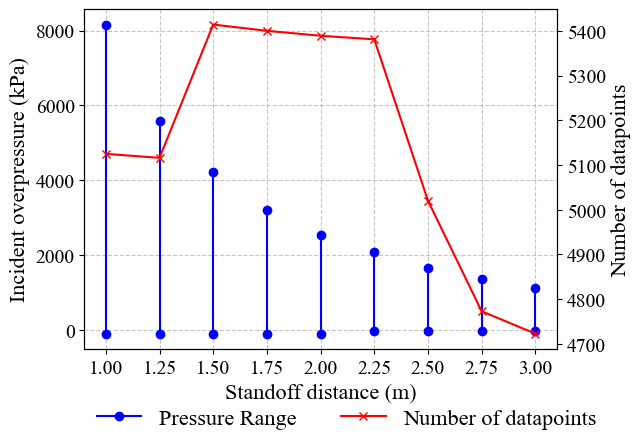

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Filter the DataFrame to include only rows with Standoff distance >= 3
#filtered_df = results_df[results_df['Standoff distance'] >= 5]

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot max and min pressure values with standoff distance
for _, row in results_df .iterrows():
    ax1.plot([row['standoff distance'], row['standoff distance']],
             [row['min_pressure'], row['max_pressure']],
             color='blue', marker='o', label='Pressure Range' if _ == results_df .index[0] else "")

# Label the primary y-axis (for pressure values)
ax1.set_xlabel('Standoff distance (m)')
ax1.set_ylabel('Incident overpressure (kPa)')
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xticks([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
#ax1.set_xlim(2.8,31)

# Create a secondary y-axis for the number of data points
ax2 = ax1.twinx()
ax2.plot(results_df ['standoff distance'], results_df ['datapoints'],
         color='red', marker='x', label='Number of datapoints')
ax2.set_ylabel('Number of datapoints')
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xticks([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
#ax1.set_xlim(2.8,31)

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legend handles and labels from both axes
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

# Add legend outside the plot with two columns
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=16, frameon=False)

# Title and layout adjustments
# plt.title('Pressure Range and Number of Datapoints vs. Standoff Distance')
fig.subplots_adjust(bottom=0.2, right = 0.8)

# Save the plot as an image
plt.savefig('IP_nearfield_info_plot.png', dpi=200, facecolor='white')

## Far_field

In [18]:
input_dir1b = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset")

#Access folders inside input folder
input_dir2b =  [folder1b for folder1b in input_dir1b.iterdir() if folder1b.is_dir()]
#print ("INPUT 2",input_dir2)

In [30]:
# Dictionary to store max pressure for each file across all folders
max_pressure_per_SD_b = {}
min_pressure_per_SD_b = {}
datapoints_per_SD_b = {}

# Iterate through each folder in input_dir2
for folder in input_dir2b:
    print(f"Processing folder: {folder}")
    
    values = list(range(1, 60, 4))
    values.append(59)
    
    # Iterate through files in the folder (assuming files are named as file1, file2, etc.)
    for i in values:  # Assuming file names are like file1, file2, ... file99
        file_name = f"P{i}.xlsx"
        file_path = folder / file_name
        
        if file_path.exists():
            # Read the file (assuming it is in a format that can be read by pandas, e.g., CSV, Excel)
            try:
                df = pd.read_excel(file_path)  # Modify this if files are not CSV (e.g., use pd.read_excel for Excel files)
                
                # Assuming the pressure data is in a column named 'Pressure'
                max_pressure = df["Pressure"].max()
                min_pressure = df["Pressure"].min()
                datapoints = len(df["Pressure"])
                
                # Update max pressure for this file across all folders
                if i not in max_pressure_per_SD_b:
                    max_pressure_per_SD_b[i] = max_pressure
                else:
                    max_pressure_per_SD_b[i] = max(max_pressure_per_SD_b[i], max_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in min_pressure_per_SD_b:
                    min_pressure_per_SD_b[i] = min_pressure
                else:
                    min_pressure_per_SD_b[i] = min(min_pressure_per_SD_b[i], min_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in datapoints_per_SD_b:
                    datapoints_per_SD_b[i] = datapoints
                else:
                    datapoints_per_SD_b[i] = datapoints_per_SD_b[i] + datapoints
                
                print(f"Max pressure for {i} in {folder}: {max_pressure}, {min_pressure}, {datapoints}")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            # If the file does not exist, stop looking for further files (assumes sequential naming)
            break

Processing folder: G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1
Max pressure for 1 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 490.827625, -33.80842187499999, 155
Max pressure for 5 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 46.4333125, -11.867148438000001, 155
Max pressure for 9 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 20.033562500000002, -6.793304688000006, 155
Max pressure for 13 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 12.668398440000004, -4.669960938000003, 155
Max pressure for 17 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 9.072210940000005, -3.5173125000000027, 155
Max pressure for 21 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 6.7878515599

In [31]:
print (max_pressure_per_SD_b)

{1: 8187.154, 5: 1117.183375, 9: 308.02071875, 13: 139.80642188000002, 17: 83.15904688, 21: 56.666484380000014, 25: 42.190593750000005, 29: 33.250609380000014, 33: 27.729414059999982, 37: 23.304031249999994, 41: 20.037117190000004, 45: 17.368742190000006, 49: 15.314867190000001, 53: 14.192148440000011, 57: 12.860539059999994, 59: 12.128093750000005}


In [32]:
# Given SD mapping
SD_mapping_b = {
    1: 1, 5: 3, 9: 5, 13: 7, 17: 9, 21: 11, 25: 13, 29: 15, 33: 17, 37: 19, 41:21, 45:23, 49:25, 53:27, 57:29, 59:30}

# Extract standoff distances from the file names based on SD_mapping
standoff_distances_b = [SD_mapping_b[file] for file in max_pressure_per_SD_b.keys()]

# Create a DataFrame using the dictionaries
results_df_b = pd.DataFrame({
    'standoff distance': standoff_distances_b,
    'max_pressure': [max_pressure_per_SD_b[file] for file in max_pressure_per_SD_b.keys()],
    'min_pressure': [min_pressure_per_SD_b[file] for file in min_pressure_per_SD_b.keys()],
    'datapoints': [datapoints_per_SD_b[file] for file in datapoints_per_SD_b.keys()]
})

# Display the DataFrame
print(results_df_b)

    standoff distance  max_pressure  min_pressure  datapoints
0                   1   8187.154000   -100.831559        8398
1                   3   1117.183375    -36.248738        6609
2                   5    308.020719    -29.553883        6141
3                   7    139.806422    -21.525898        5826
4                   9     83.159047    -16.534297        5742
5                  11     56.666484    -13.353719        5648
6                  13     42.190594    -11.166602        5596
7                  15     33.250609     -9.561188        5580
8                  17     27.729414     -8.337711        5580
9                  19     23.304031     -7.377695        5580
10                 21     20.037117     -6.605430        5580
11                 23     17.368742     -5.972437        5615
12                 25     15.314867     -5.444031        5580
13                 27     14.192148     -4.996445        5580
14                 29     12.860539     -4.613195        5580
15      

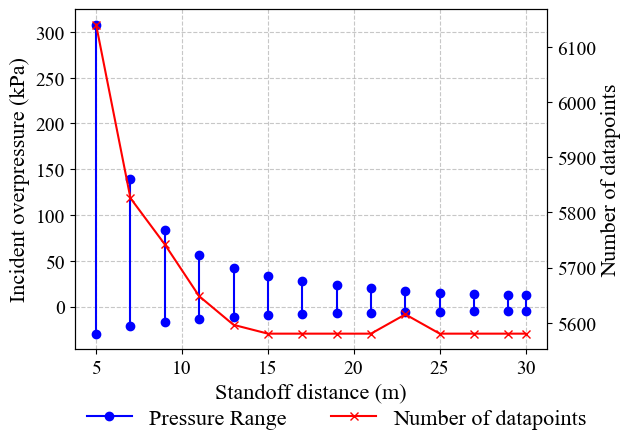

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Filter the DataFrame to include only rows with Standoff distance >= 3
filtered_df = results_df_b[results_df_b['standoff distance'] >= 5]

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot max and min pressure values with standoff distance
for _, row in filtered_df .iterrows():
    ax1.plot([row['standoff distance'], row['standoff distance']],
             [row['min_pressure'], row['max_pressure']],
             color='blue', marker='o', label='Pressure Range' if _ == filtered_df.index[0] else "")

# Label the primary y-axis (for pressure values)
ax1.set_xlabel('Standoff distance (m)')
ax1.set_ylabel('Incident overpressure (kPa)')
ax1.tick_params(axis='both', labelsize=14)
#ax1.set_xticks([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
#ax1.set_xlim(2.8,31)

# Create a secondary y-axis for the number of data points
ax2 = ax1.twinx()
ax2.plot(filtered_df['standoff distance'], filtered_df['datapoints'],
         color='red', marker='x', label='Number of datapoints')
ax2.set_ylabel('Number of datapoints')
ax2.tick_params(axis='y', labelsize=14)
#ax2.set_xticks([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
#ax1.set_xlim(2.8,31)

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legend handles and labels from both axes
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

# Add legend outside the plot with two columns
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=16, frameon=False)

# Title and layout adjustments
# plt.title('Pressure Range and Number of Datapoints vs. Standoff Distance')
fig.subplots_adjust(bottom=0.2, right = 0.8)

# Save the plot as an image
plt.savefig('IP_farfield_info_plot.png', dpi=200, facecolor='white')